# IRAT Figures - Current Score Predictions

In [17]:
# basic imports
import os 
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300

def save_fig(filename, AXIS=False):
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True) 
    return

In [18]:
df = pd.read_csv('results/irat_average_qdistances_current.csv')

# filter by positive average qdistances
df = df[(df['HA Average Qdistance'] > 0) & (df['NA Average Qdistance'] > 0)]
df.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean
Potential Emergence Estimate,1.000000,0.825066,0.062975,0.063824,-0.292459,-0.697519,-0.685388,-0.591105
Potential Impact Estimate,0.825066,1.000000,-0.086134,-0.085423,-0.030812,-0.625708,-0.523396,-0.433414
HA Qnet Sample,0.062975,-0.086134,1.000000,0.999997,-0.715187,-0.113250,-0.371502,-0.446144
NA Qnet Sample,0.063824,-0.085423,0.999997,1.000000,-0.715635,-0.114215,-0.372462,-0.447419
HA Average Qdistance,-0.292459,-0.030812,-0.715187,-0.715635,1.000000,0.280634,0.619818,0.705934
NA Average Qdistance,-0.697519,-0.625708,-0.113250,-0.114215,0.280634,1.000000,0.927136,0.831240
Both Average Qdistance,-0.685388,-0.523396,-0.371502,-0.372462,0.619818,0.927136,1.000000,0.954301
Geometric Mean,-0.591105,-0.433414,-0.446144,-0.447419,0.705934,0.831240,0.954301,1.000000


## Arithmetic Mean
- Uses arithmetic mean of HA and NA average qdistance vs IRAT score

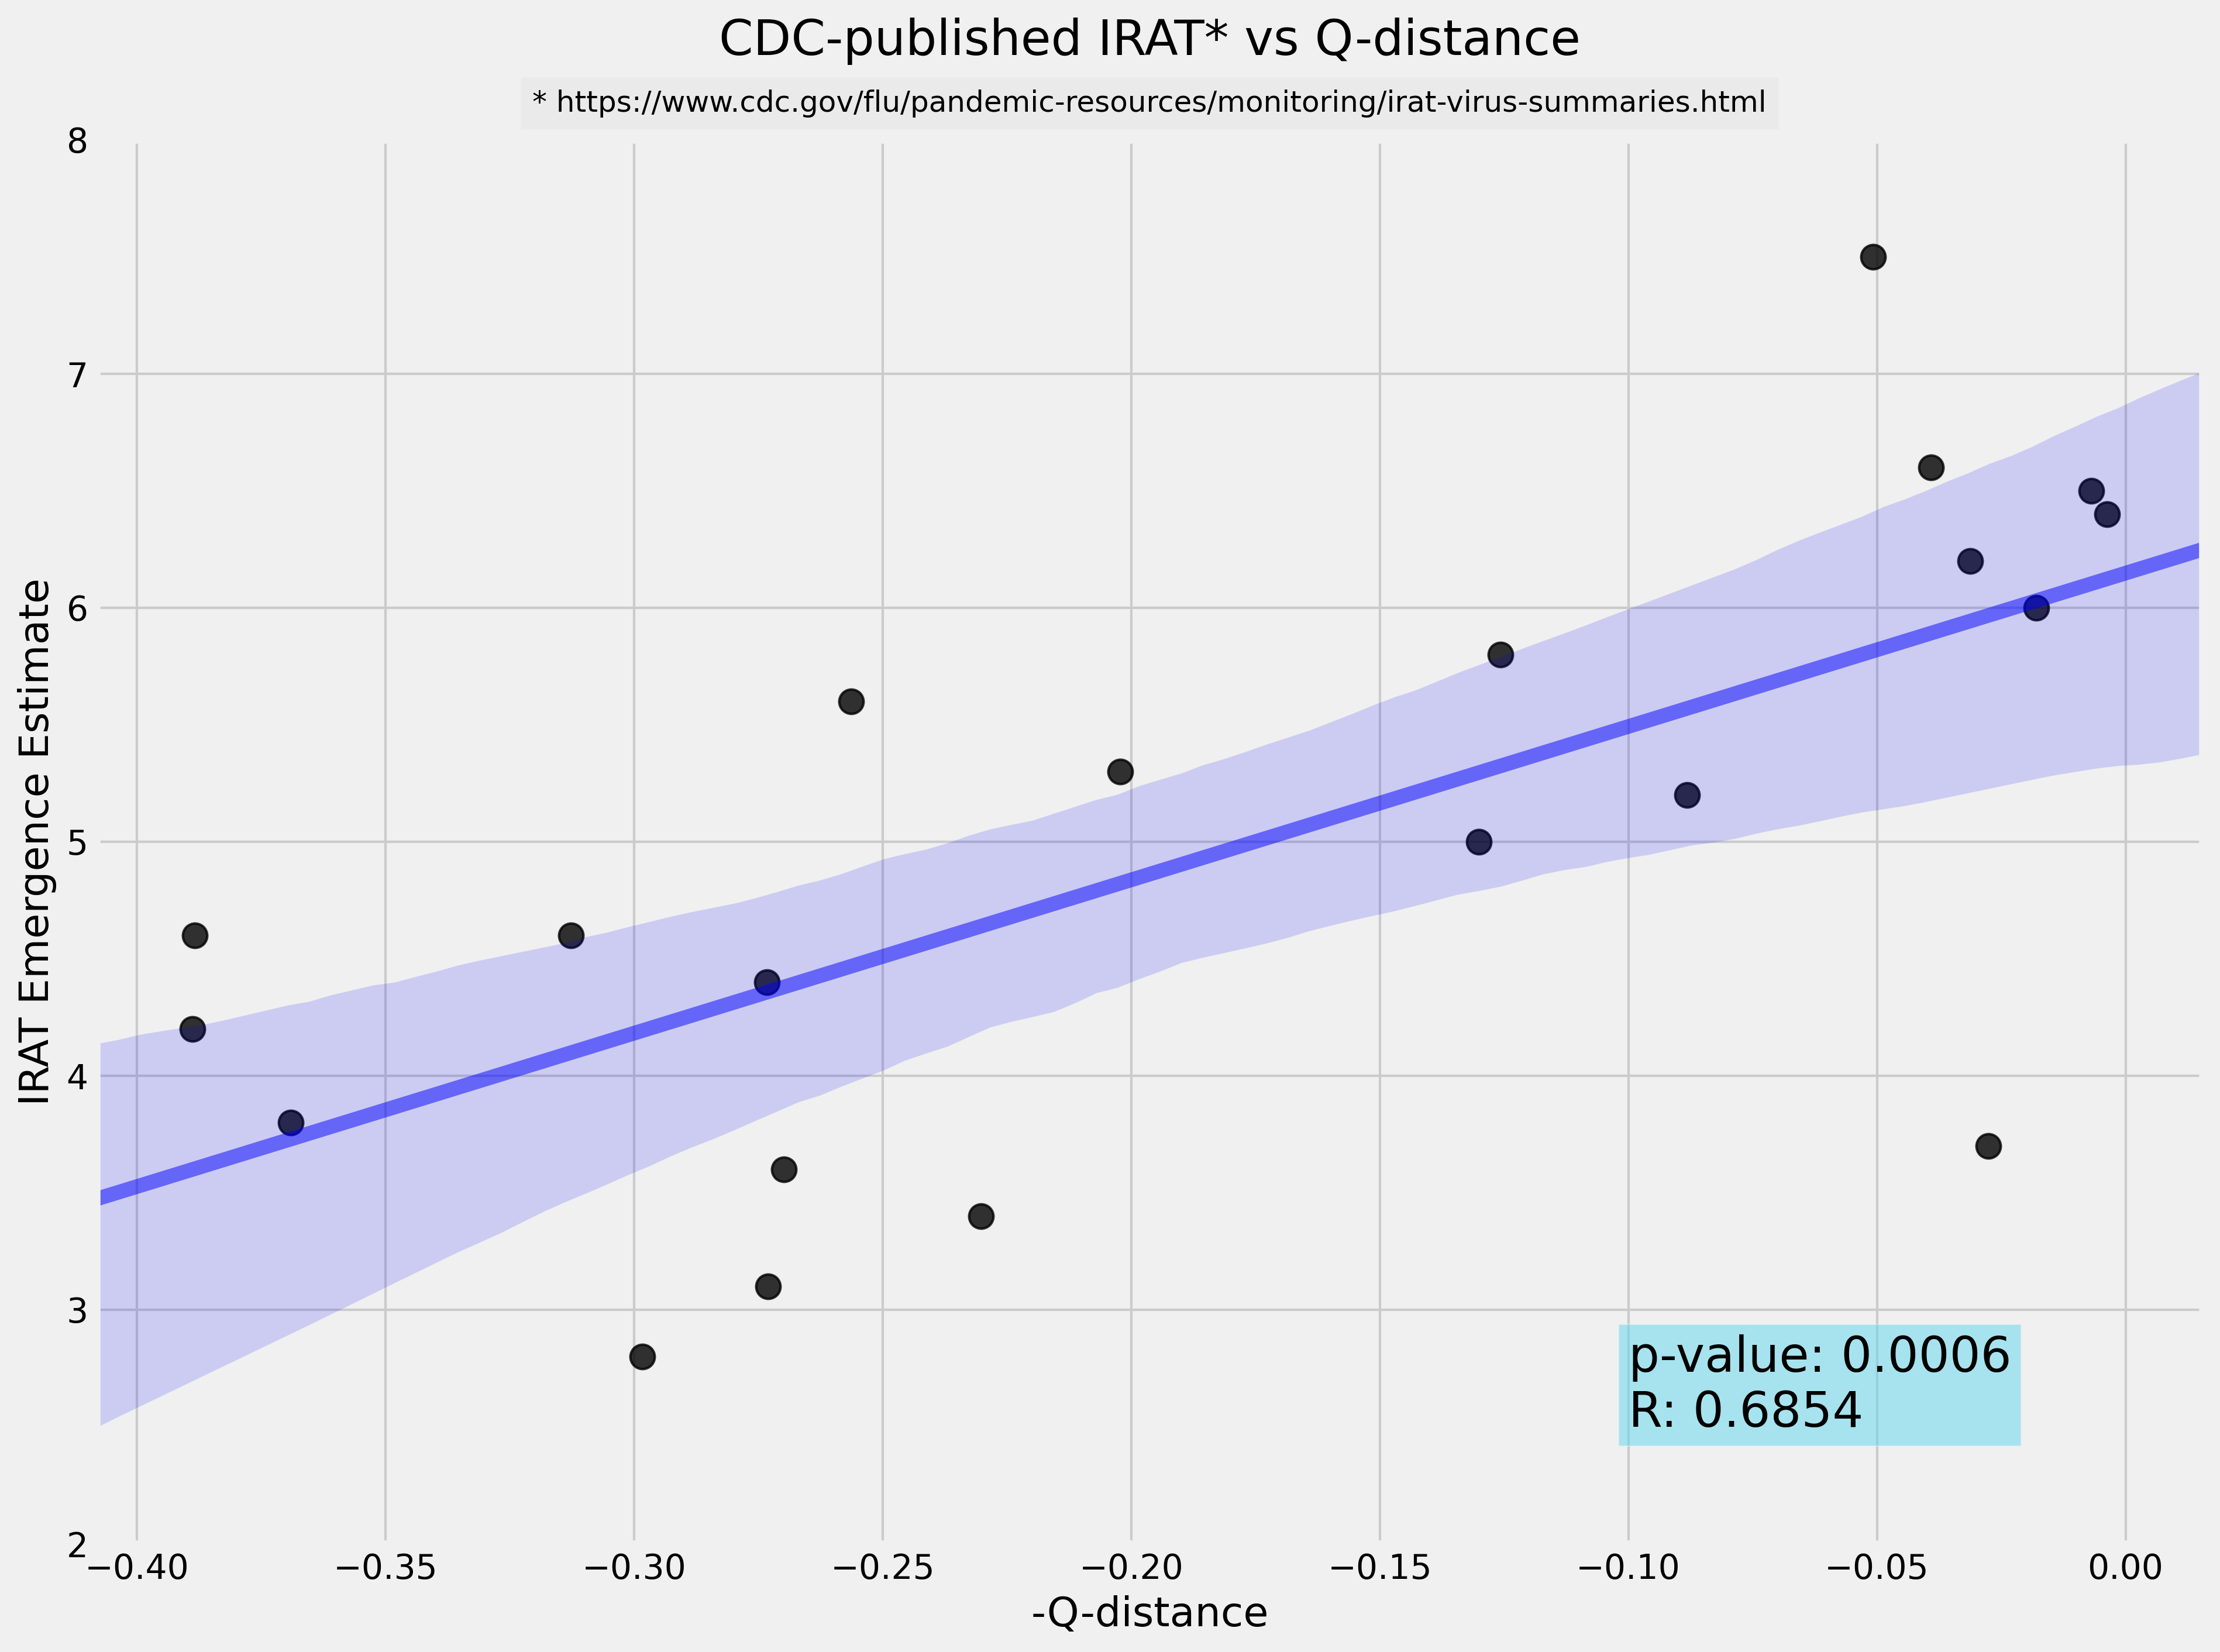

In [19]:
X = df['Both Average Qdistance']
Y = df['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

# plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.12, 0.22, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.76, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.32, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.72, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.65, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.88, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.59, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.89, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.8, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined_arithmetic_current',AXIS=True)

In [20]:
coords_df = df[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.298335,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.273095,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.230172,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.269814,3.6
17,A/canine/Illinois/12191/2015,H3N2,0.027652,3.7
16,A/Northern pintail/Washington/40964/2014,H5N2,0.369083,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.388818,4.2
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.273283,4.4
12,A/Netherlands/219/2003,H7N7,0.312679,4.6
11,A/Astrakhan/3212/2020,H5N8,0.388402,4.6


## Geometric Mean
- Uses geometric mean of HA and NA average qdistance vs IRAT score

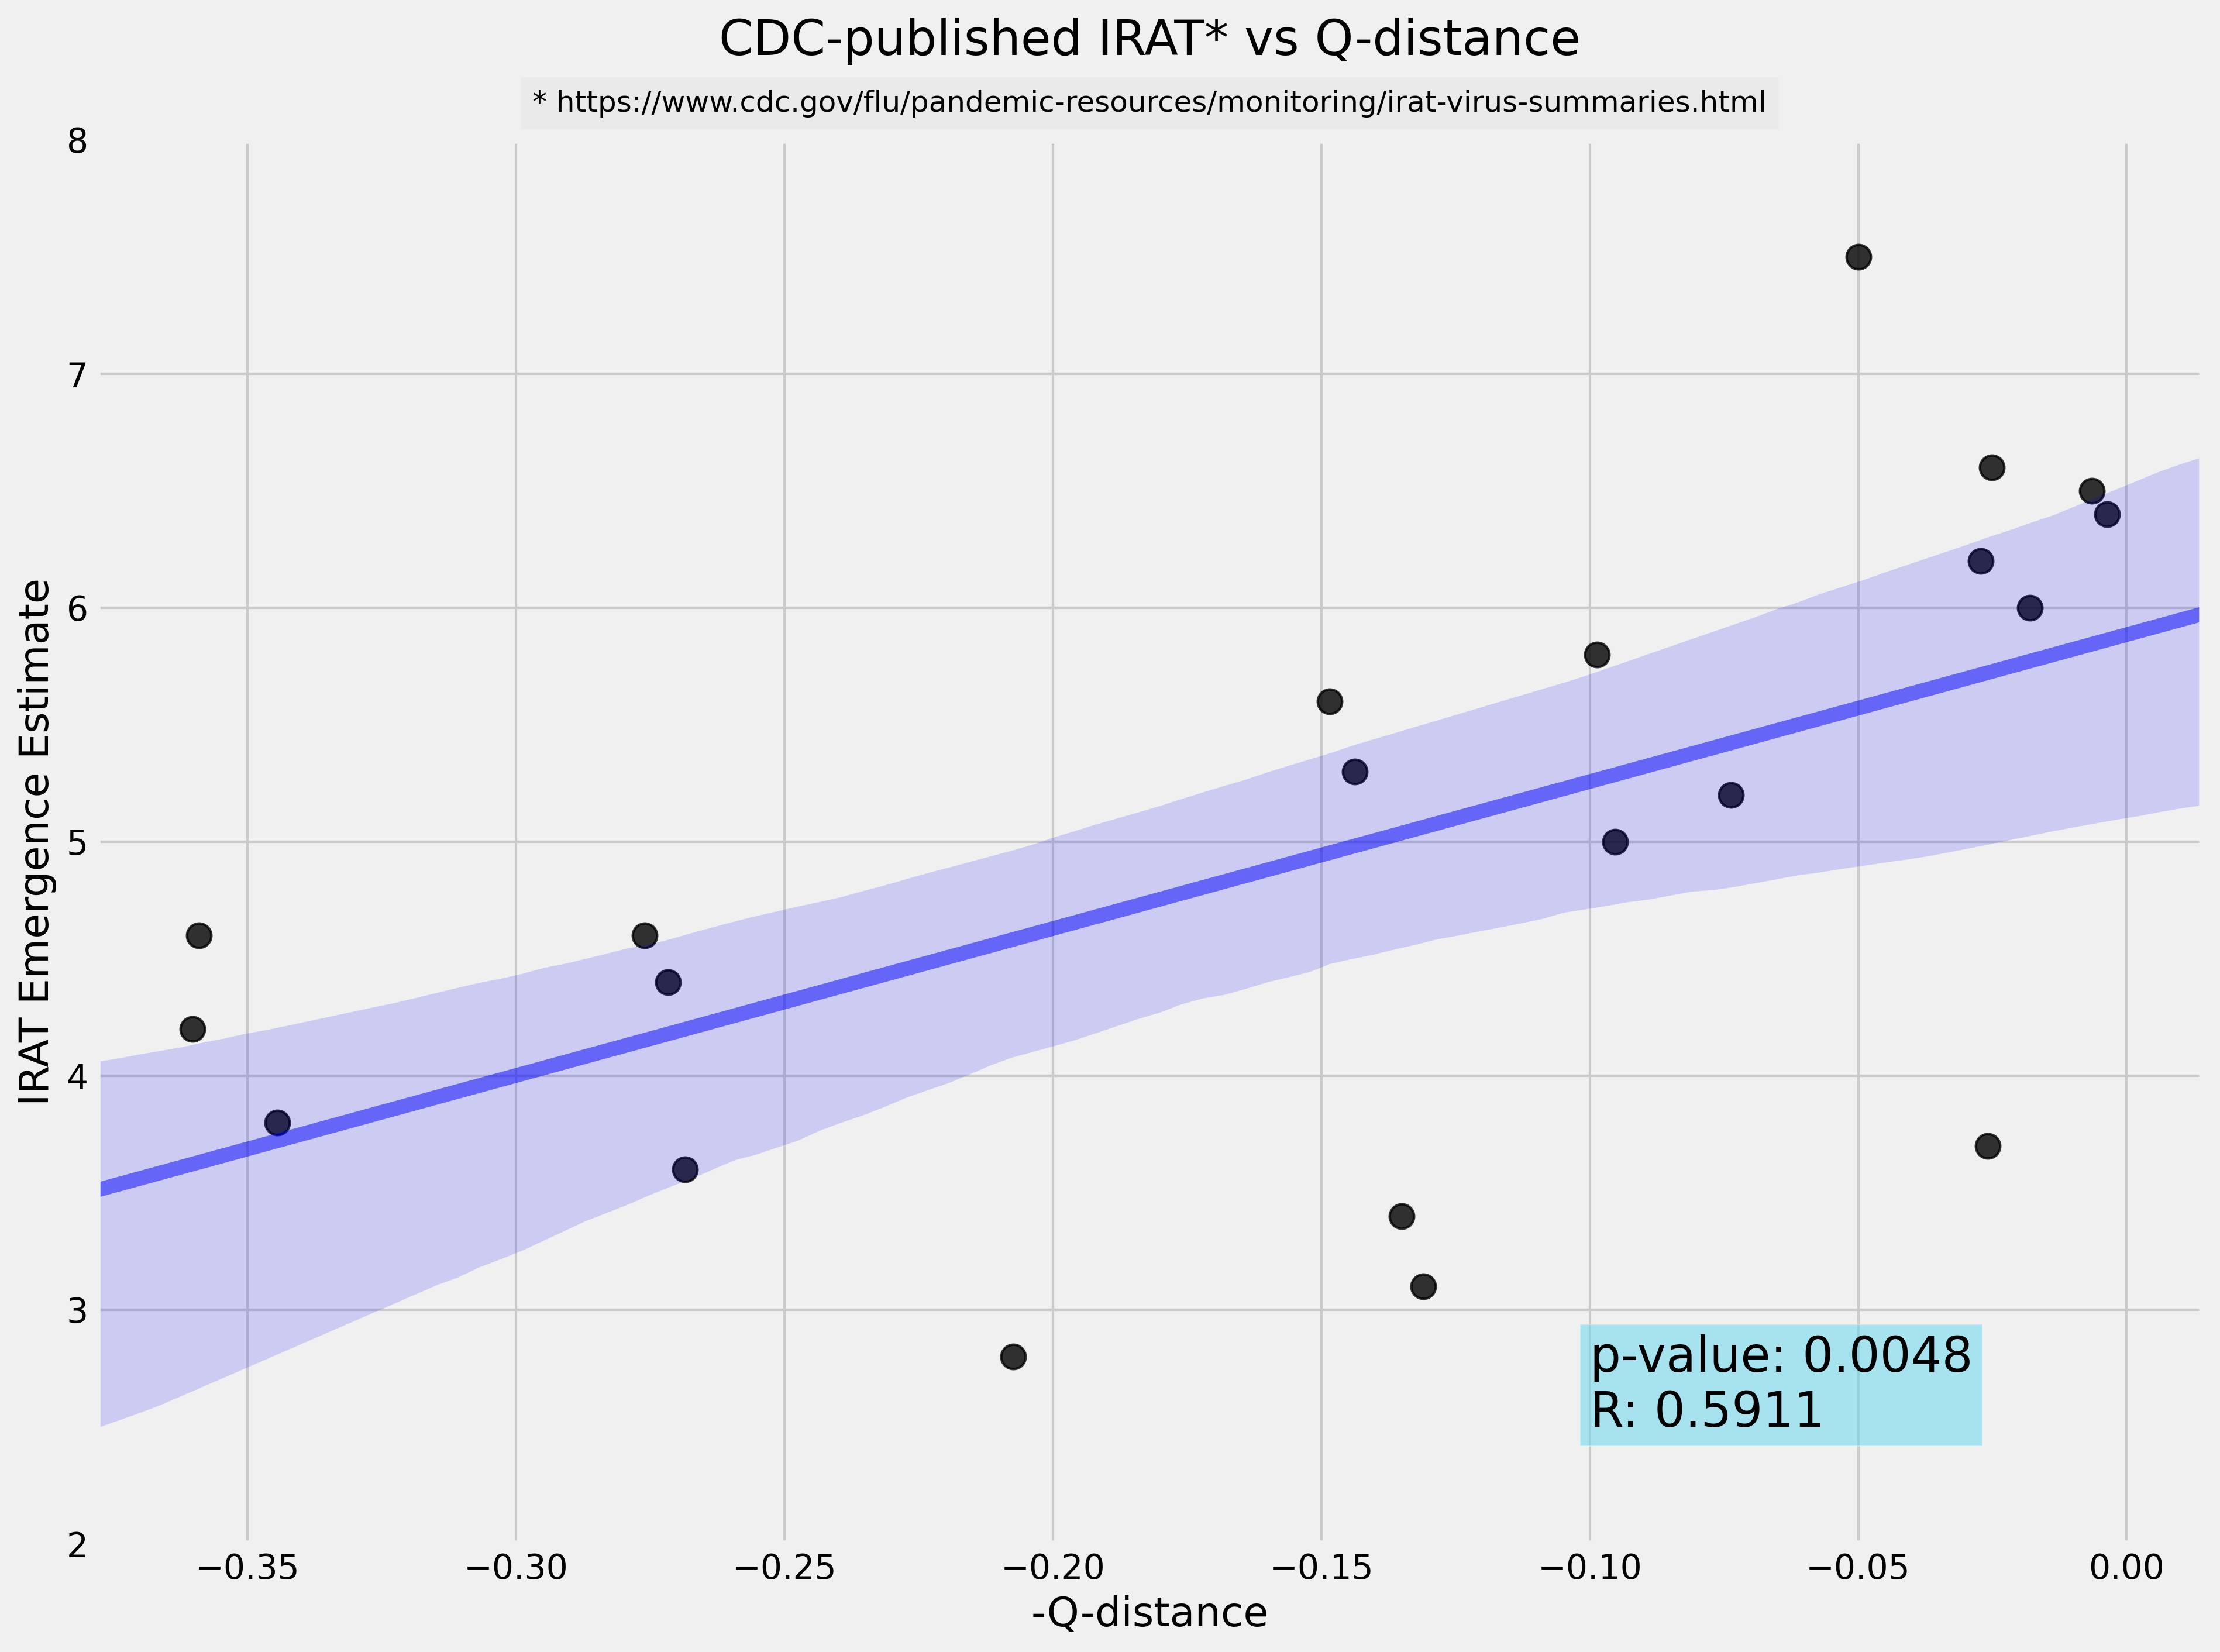

In [21]:
X = df['Geometric Mean']
Y = df['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

# plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.12, 0.22, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.77, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.48, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.78, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.64, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.88, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.66, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.89, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.81, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined_geometric_current',AXIS=True)

In [22]:
coords_df = df[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.207456,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.130979,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.135107,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.268575,3.6
17,A/canine/Illinois/12191/2015,H3N2,0.025861,3.7
16,A/Northern pintail/Washington/40964/2014,H5N2,0.344453,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.360284,4.2
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.271731,4.4
12,A/Netherlands/219/2003,H7N7,0.276012,4.6
11,A/Astrakhan/3212/2020,H5N8,0.359110,4.6


## H1 and H3
- These strains have a lot more data available than the H5-, H7, and H9- strains

In [23]:
df_h1_h3 = df[(df['Virus Type']=='H1N1')|(df['Virus Type']=='H1N2')|(df['Virus Type']=='H3N2')]
df_h1_h3.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean
Potential Emergence Estimate,1.000000,0.903205,0.047709,0.047709,0.082773,0.247517,0.131951,0.151673
Potential Impact Estimate,0.903205,1.000000,-0.171067,-0.171067,0.327228,0.455131,0.409747,0.437134
HA Qnet Sample,0.047709,-0.171067,1.000000,1.000000,-0.970297,-0.147495,-0.957987,-0.930997
NA Qnet Sample,0.047709,-0.171067,1.000000,1.000000,-0.970297,-0.147495,-0.957987,-0.930997
HA Average Qdistance,0.082773,0.327228,-0.970297,-0.970297,1.000000,0.104395,0.977133,0.985795
NA Average Qdistance,0.247517,0.455131,-0.147495,-0.147495,0.104395,1.000000,0.313474,0.204794
Both Average Qdistance,0.131951,0.409747,-0.957987,-0.957987,0.977133,0.313474,1.000000,0.985035
Geometric Mean,0.151673,0.437134,-0.930997,-0.930997,0.985795,0.204794,0.985035,1.000000


### Arithmetic Mean

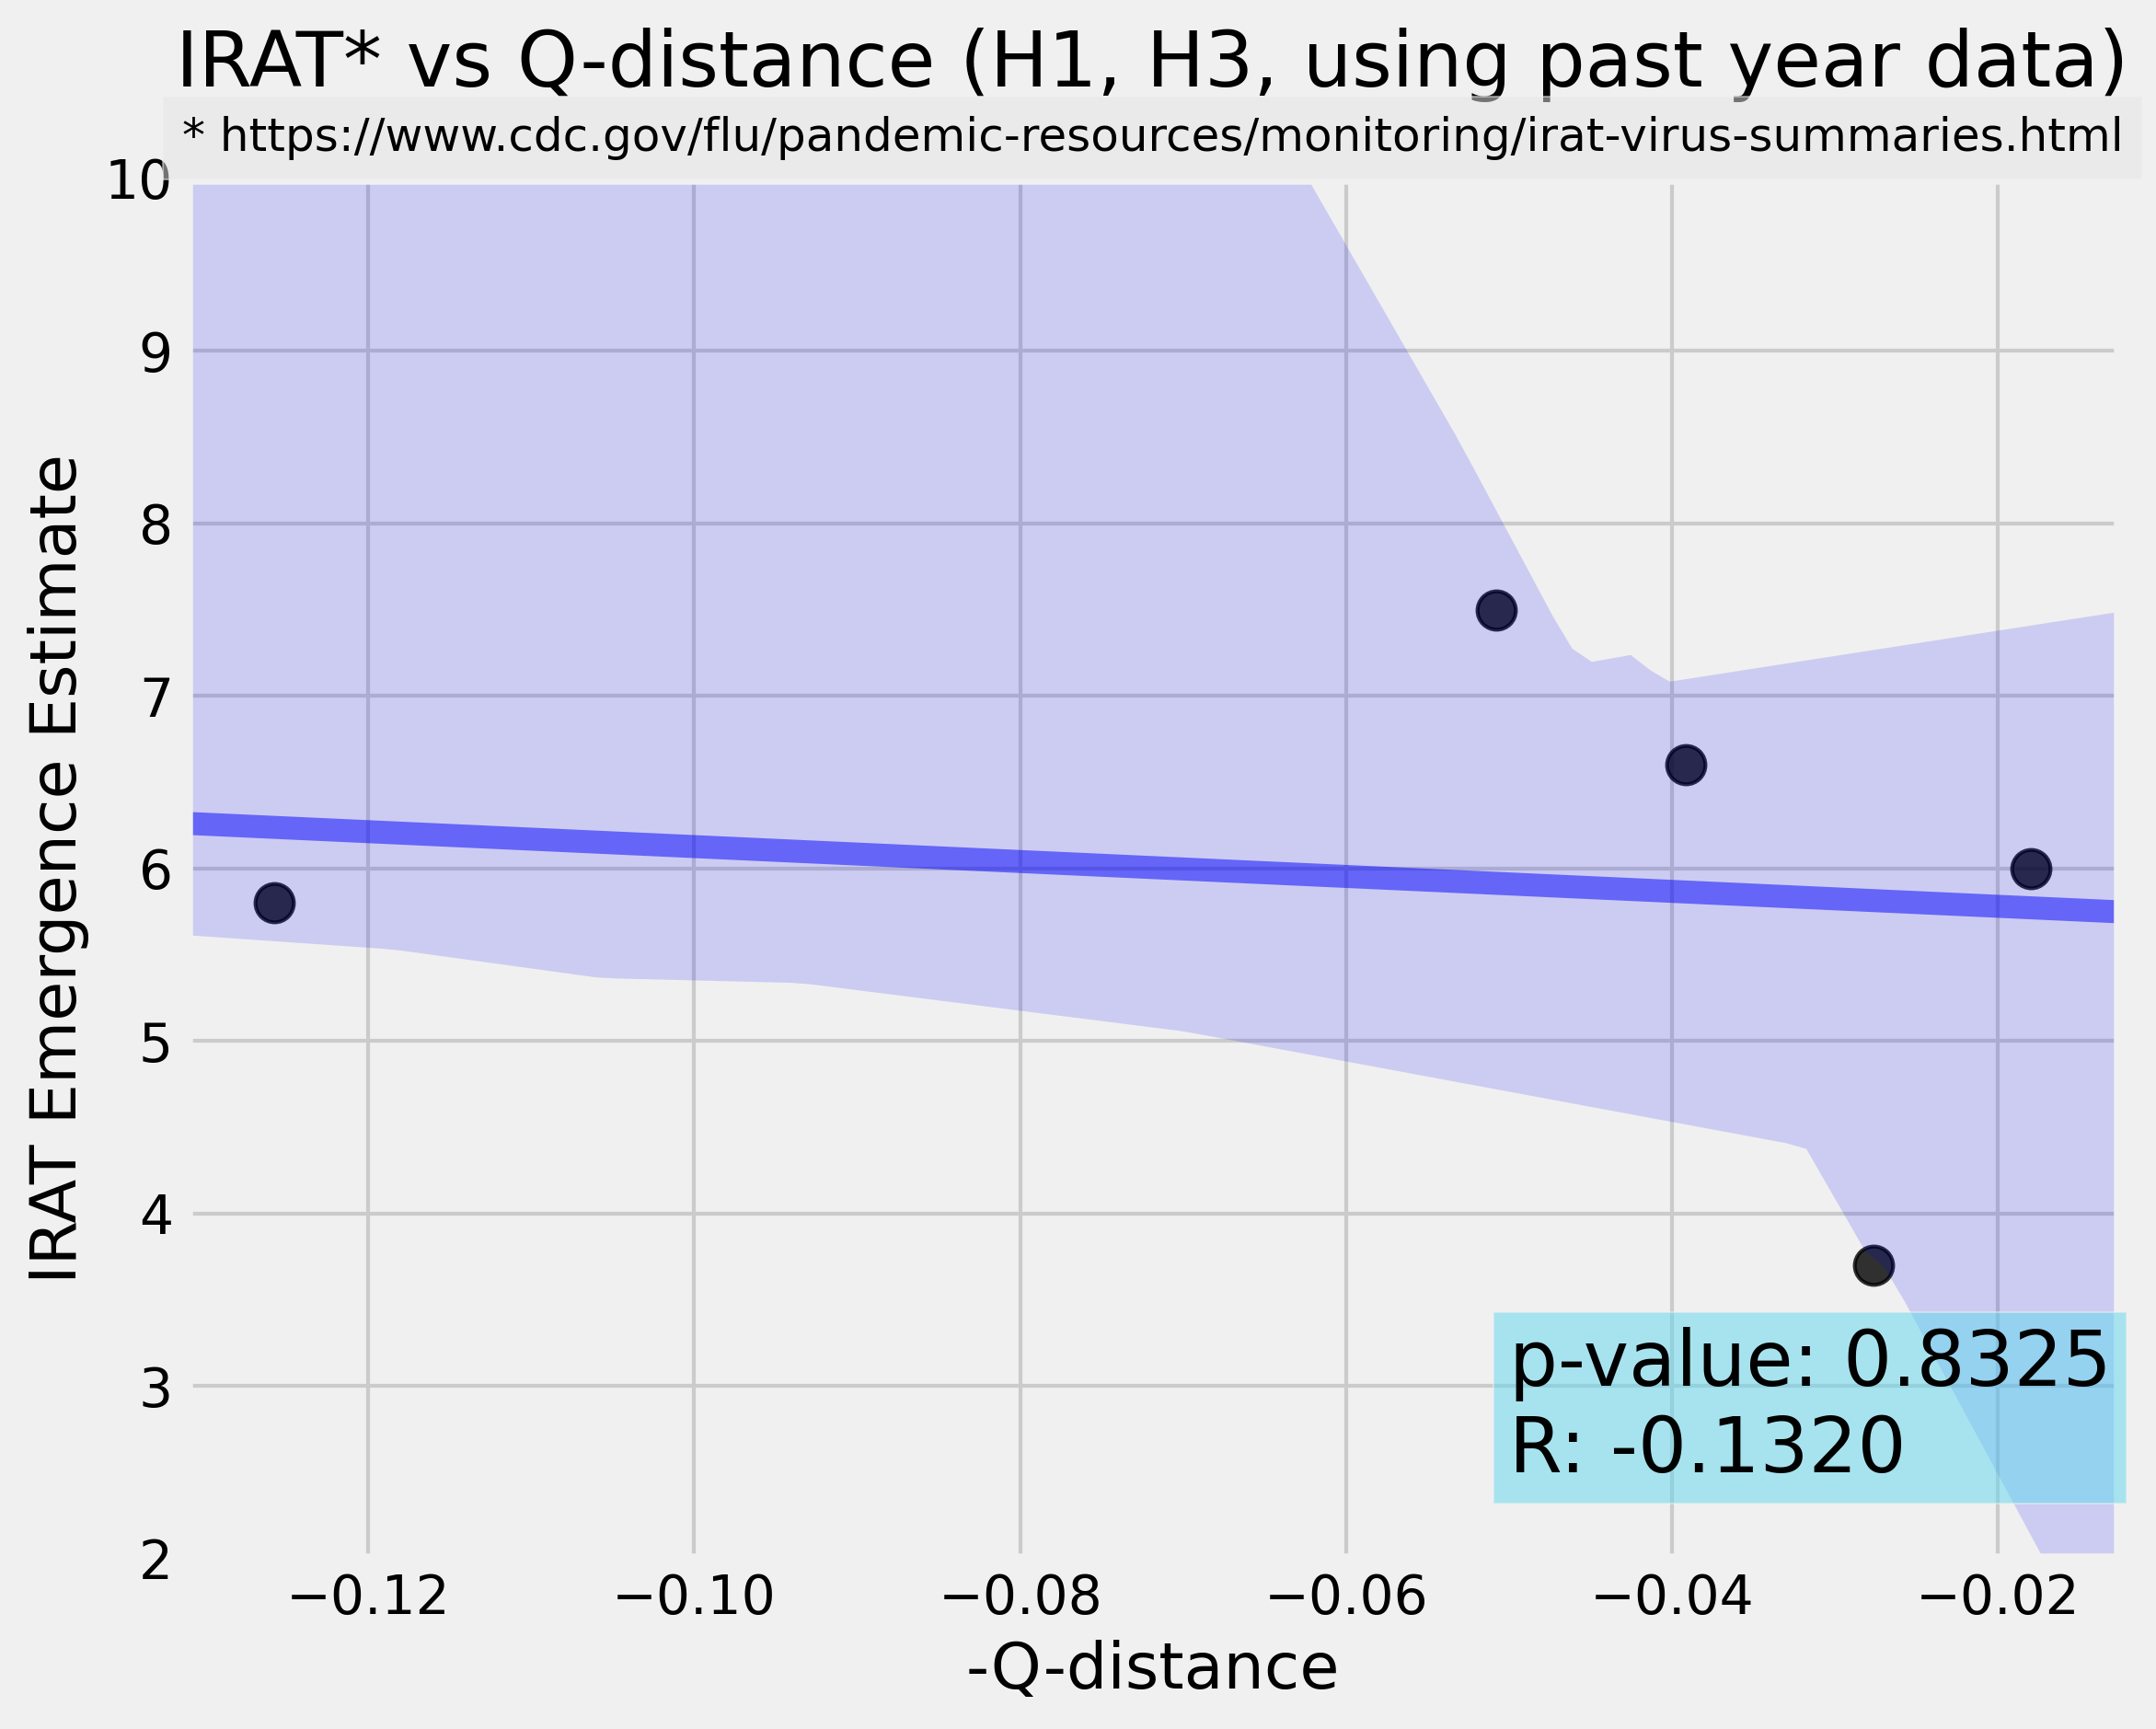

In [24]:
plt.figure(figsize = (7, 5))
X = df_h1_h3['Both Average Qdistance']
Y = df_h1_h3['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.05, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (H1, H3, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

# plt.figtext(0.18, 0.18, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.27, 0.5, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.88, 0.42, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.9, 0.62, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.59, 0.71, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h1_h3_arithmetic_current',AXIS=True)

In [25]:
coords_df = df_h1_h3[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
17,A/canine/Illinois/12191/2015,H3N2,0.027652,3.7
6,A/California/62/2018,H1N2,0.125777,5.8
5,A/Indiana/08/2011,H3N2,0.017980,6.0
1,A/Ohio/13/2017,H3N2,0.039159,6.6
0,A/swine/Shandong/1207/2016,H1N1,0.050789,7.5


### Geometric Mean

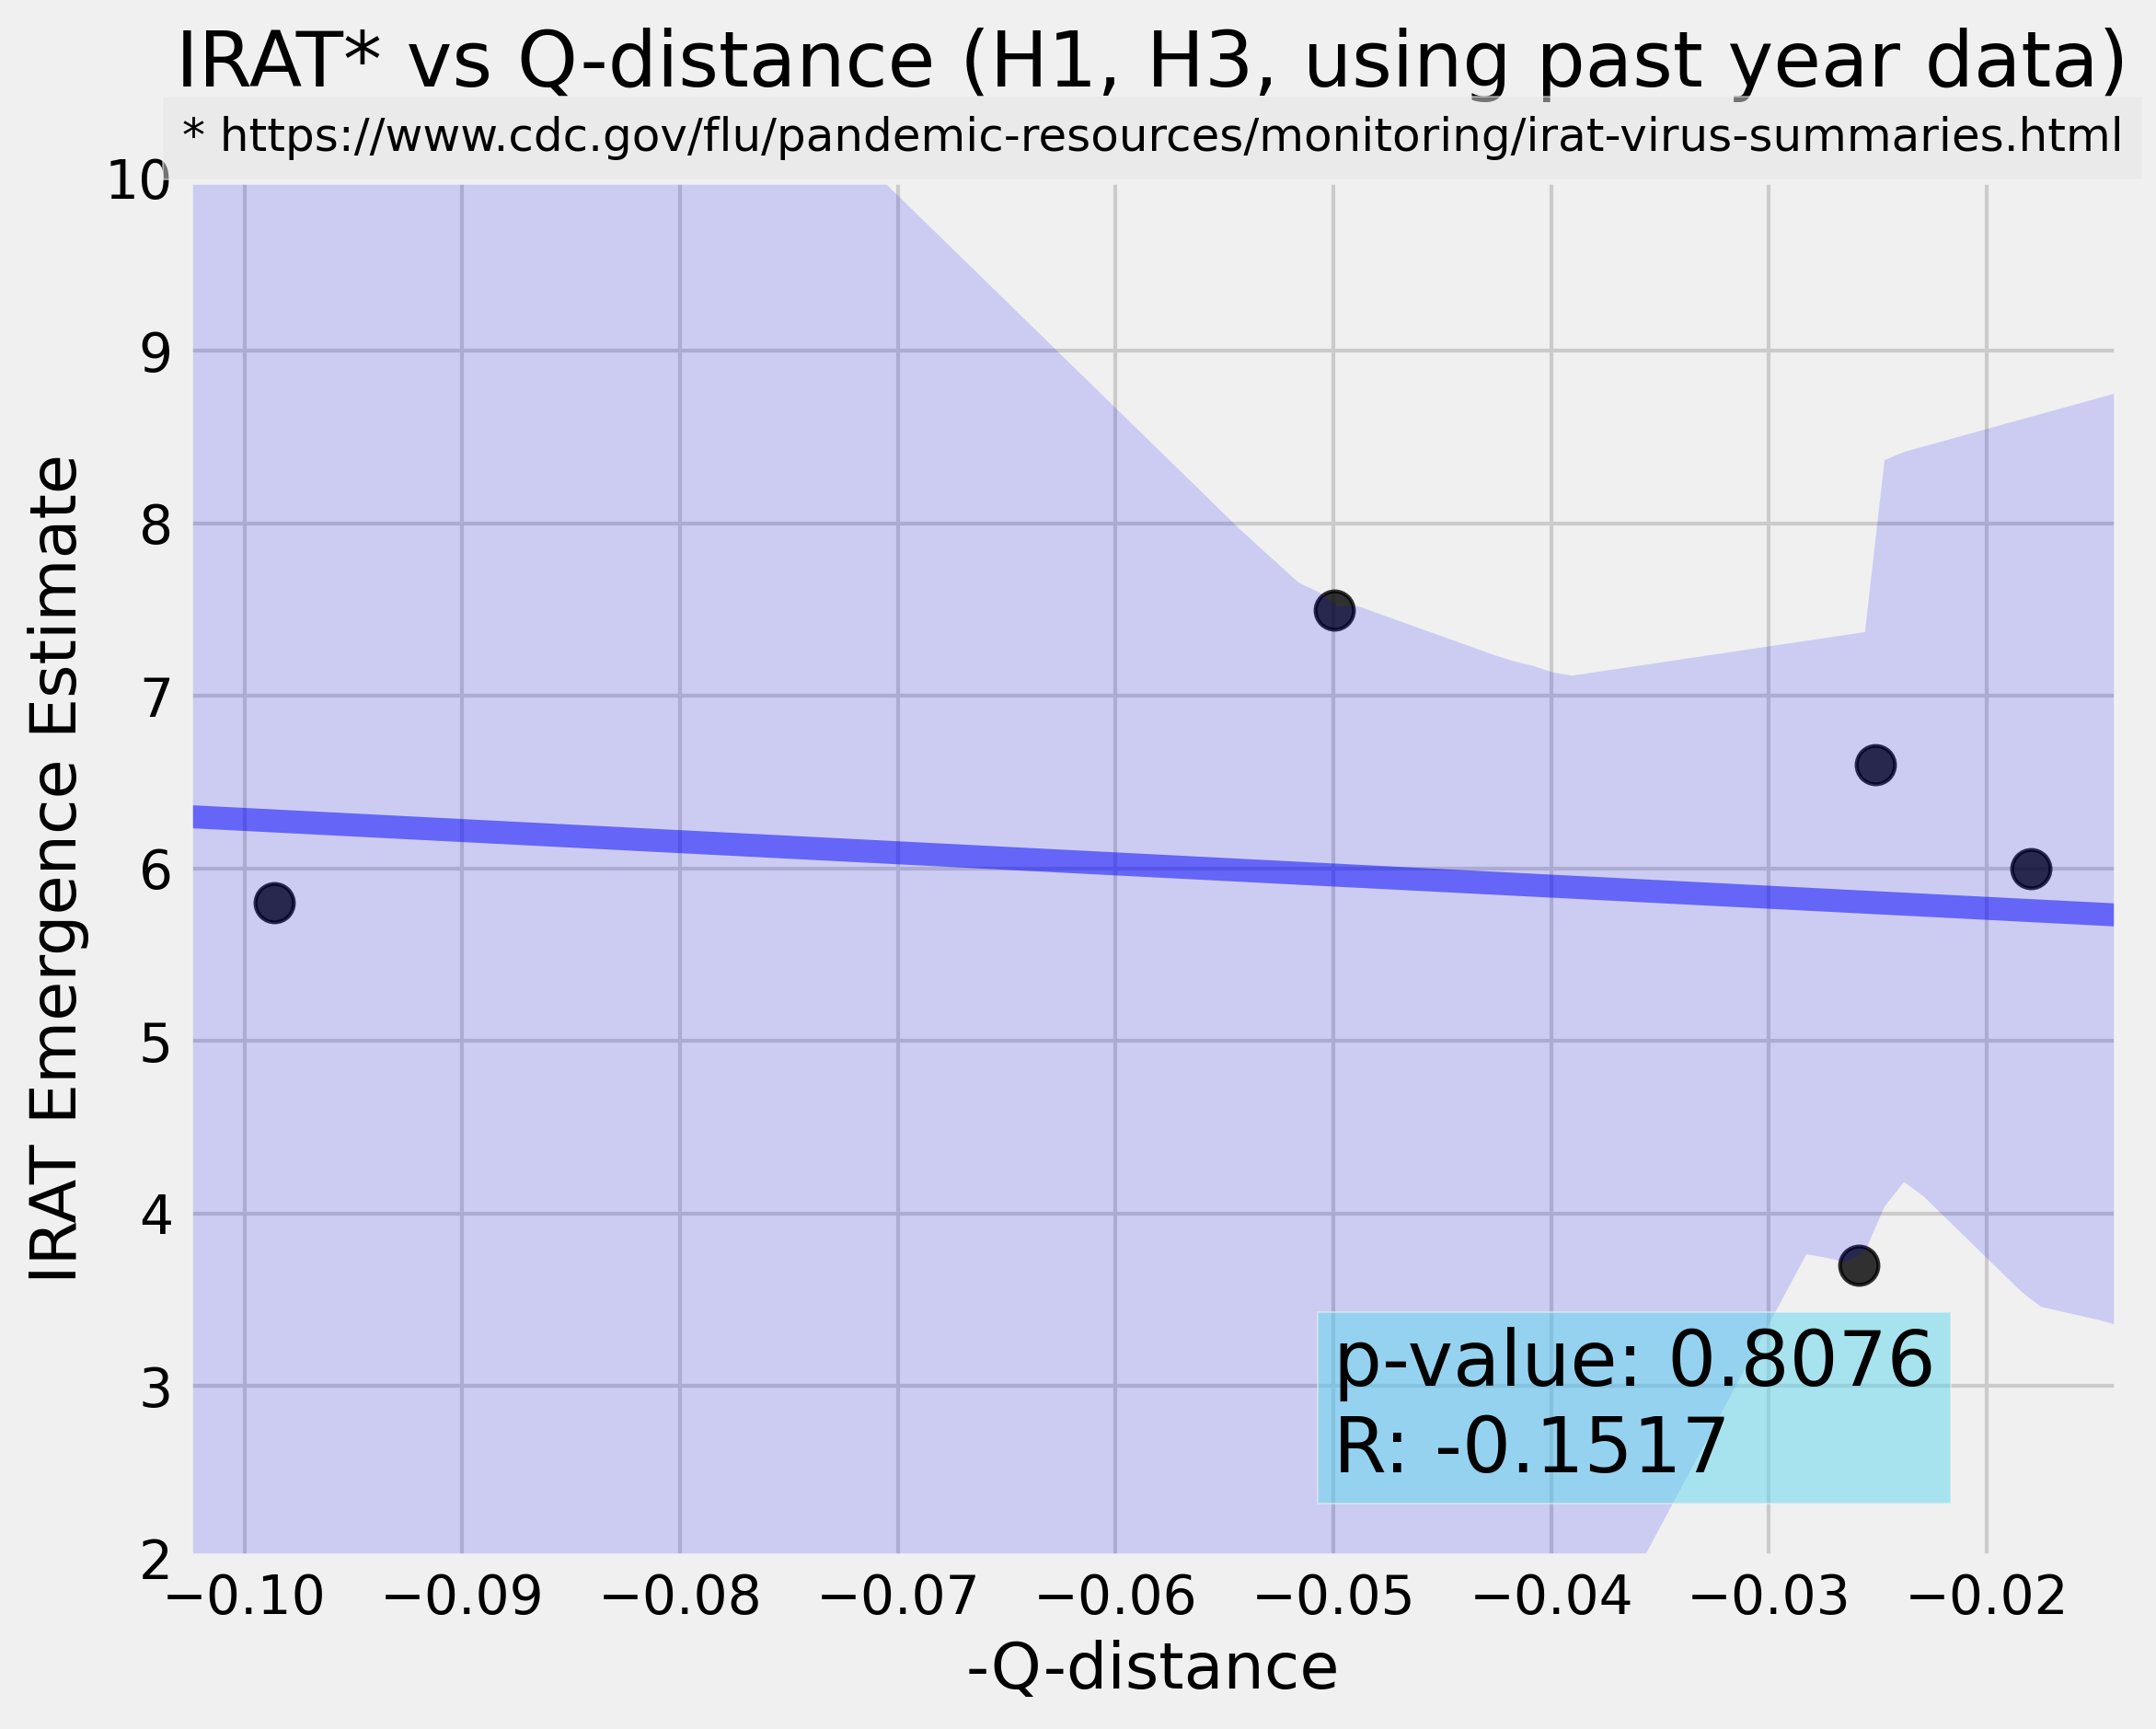

In [26]:
plt.figure(figsize = (7, 5))
X = df_h1_h3['Geometric Mean']
Y = df_h1_h3['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.05, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (H1, H3, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

# plt.figtext(0.18, 0.18, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.27, 0.5, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.88, 0.42, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.9, 0.62, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.59, 0.71, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h1_h3_geometric_current',AXIS=True)

In [27]:
coords_df = df_h1_h3[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
17,A/canine/Illinois/12191/2015,H3N2,0.025861,3.7
6,A/California/62/2018,H1N2,0.098632,5.8
5,A/Indiana/08/2011,H3N2,0.017975,6.0
1,A/Ohio/13/2017,H3N2,0.025137,6.6
0,A/swine/Shandong/1207/2016,H1N1,0.049967,7.5


## H5, H7, and H9
- These strains have less sequence data available than the H1- and H3- strains

In [28]:
df_h5_h7_h9 = df[(df['Virus Type']!='H1N1')&(df['Virus Type']!='H1N2')&(df['Virus Type']!='H3N2')]
df_h5_h7_h9.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean
Potential Emergence Estimate,1.000000,0.918845,-0.147188,-0.146098,-0.248830,-0.739878,-0.733516,-0.596836
Potential Impact Estimate,0.918845,1.000000,-0.071869,-0.070984,-0.103390,-0.818213,-0.739109,-0.588392
HA Qnet Sample,-0.147188,-0.071869,1.000000,0.999997,-0.625998,0.091591,-0.179418,-0.313878
NA Qnet Sample,-0.146098,-0.070984,0.999997,1.000000,-0.626612,0.090532,-0.180568,-0.315393
HA Average Qdistance,-0.248830,-0.103390,-0.625998,-0.626612,1.000000,0.151350,0.541354,0.663531
NA Average Qdistance,-0.739878,-0.818213,0.091591,0.090532,0.151350,1.000000,0.913023,0.785373
Both Average Qdistance,-0.733516,-0.739109,-0.179418,-0.180568,0.541354,0.913023,1.000000,0.940740
Geometric Mean,-0.596836,-0.588392,-0.313878,-0.315393,0.663531,0.785373,0.940740,1.000000


### Arithmetic Mean

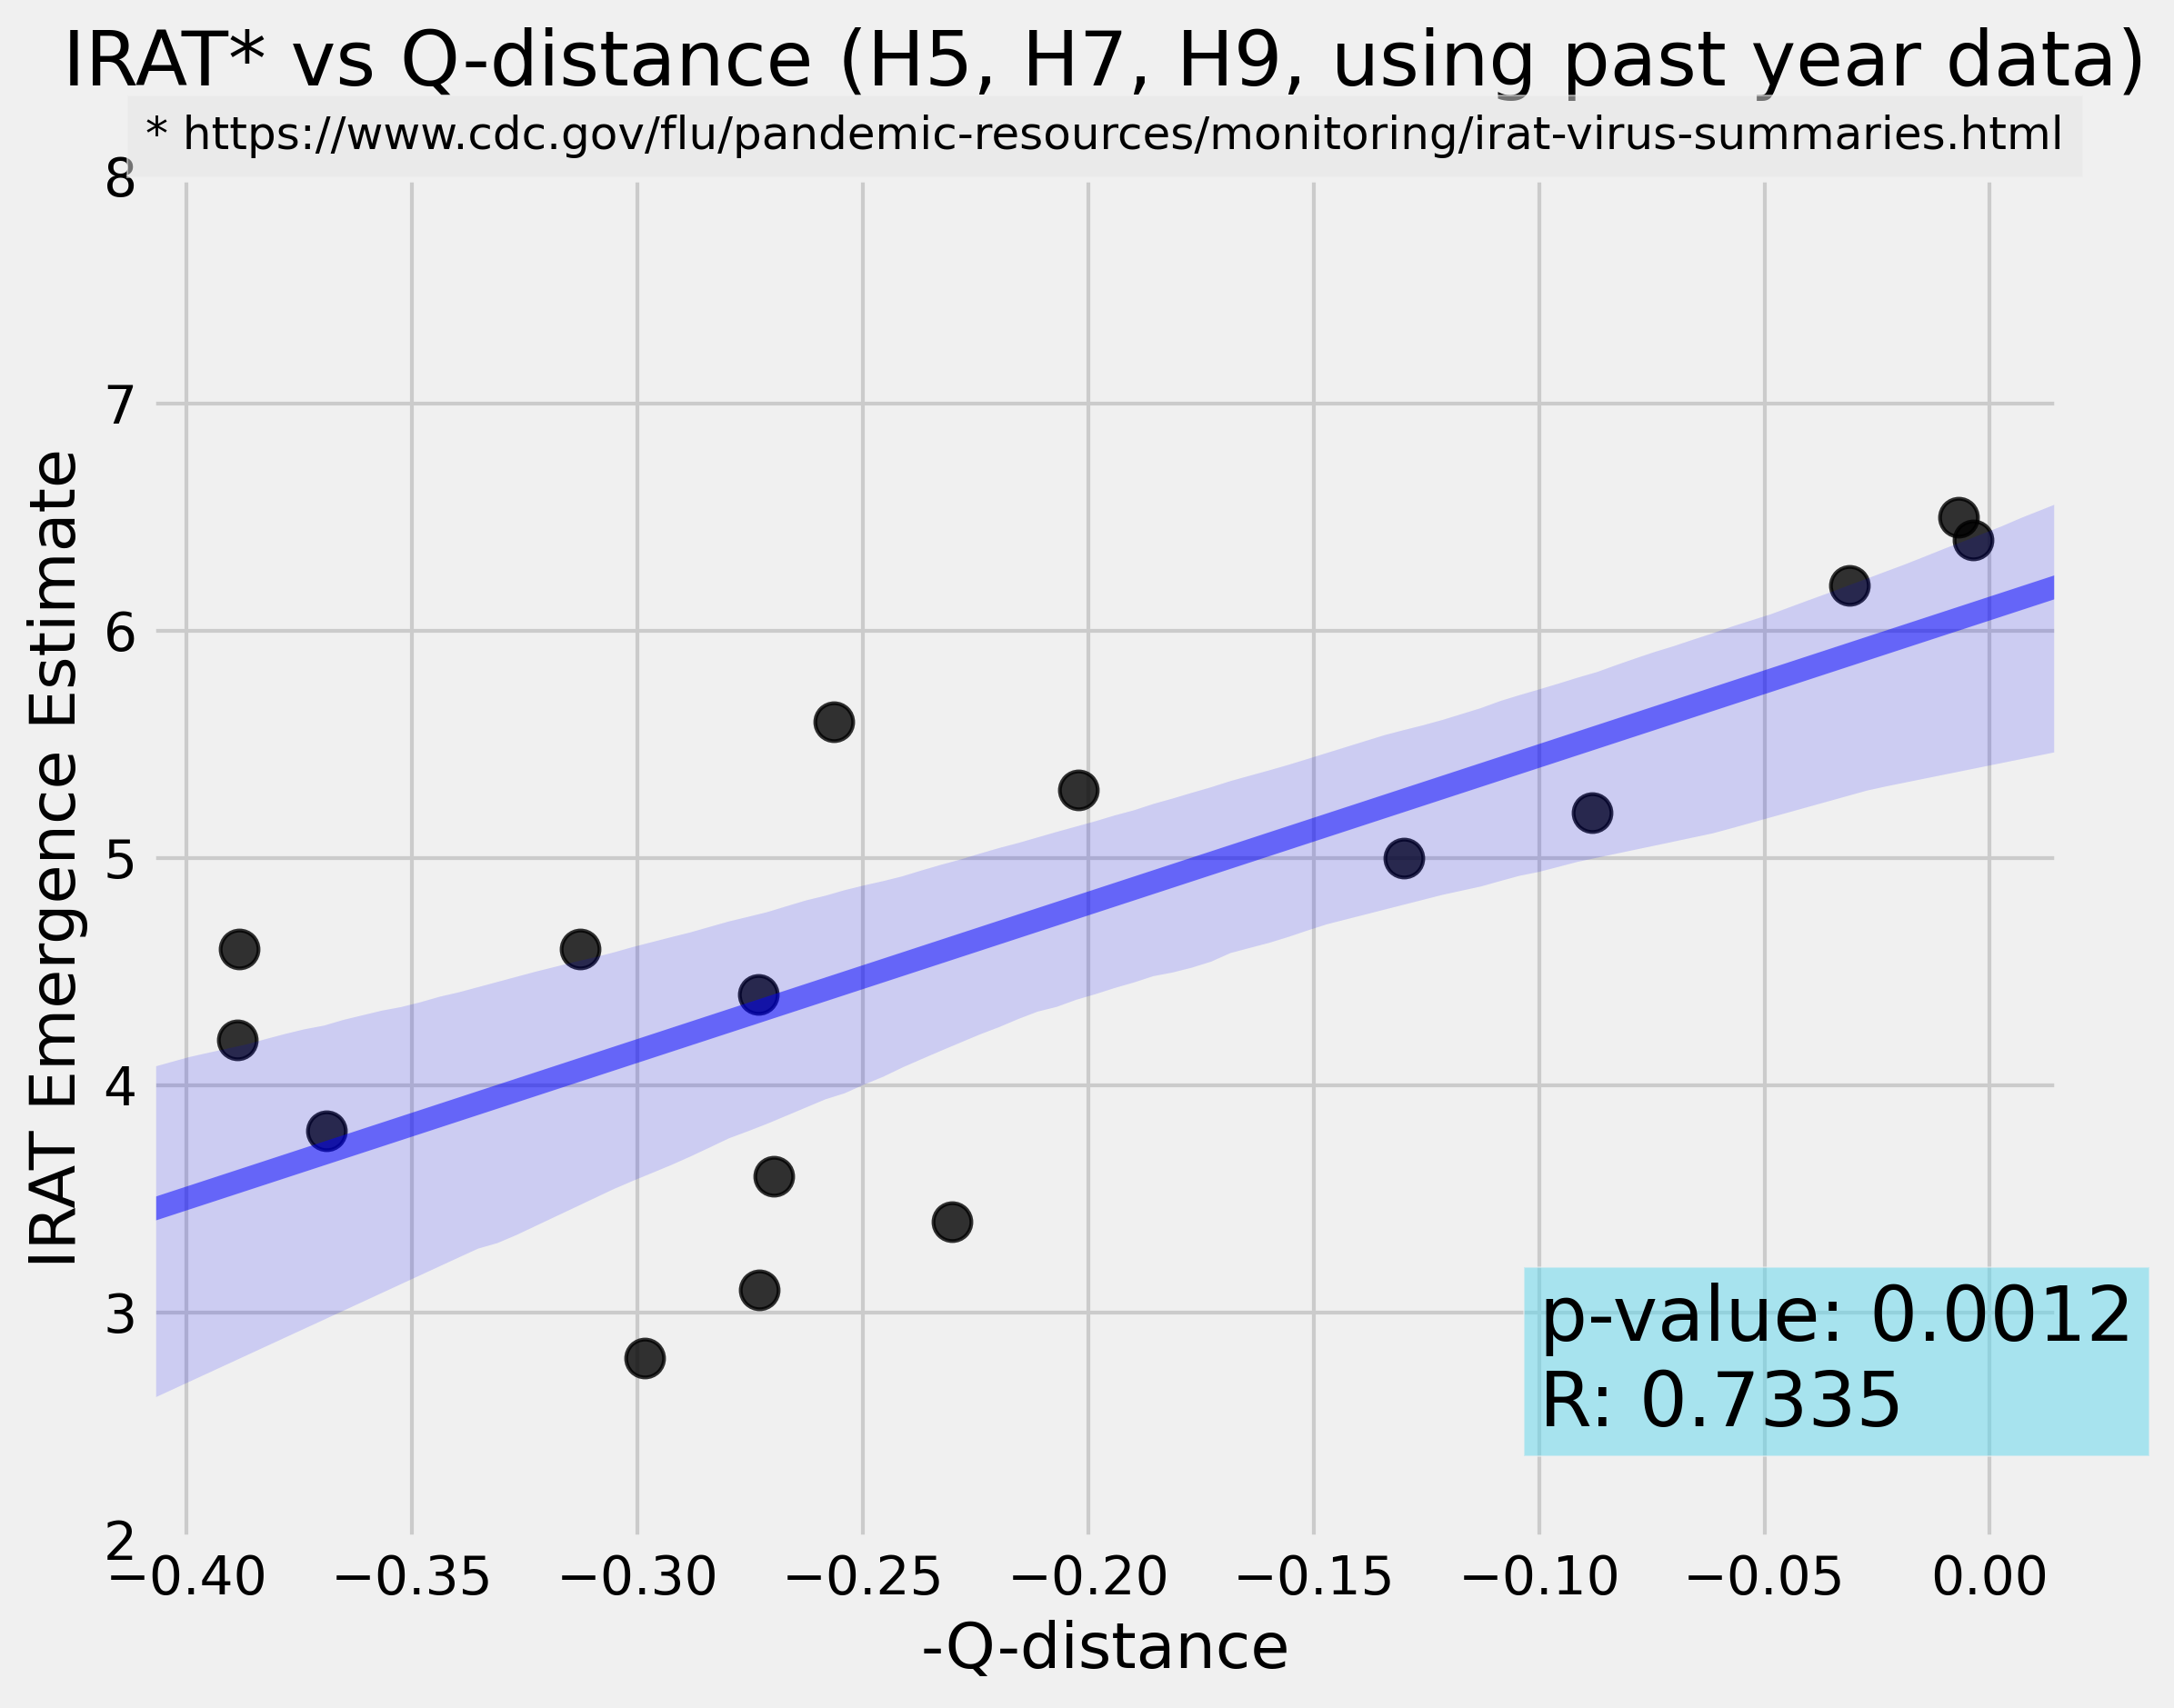

In [29]:
plt.figure(figsize = (7, 5))
X = df_h5_h7_h9['Both Average Qdistance']
Y = df_h5_h7_h9['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('IRAT* vs Q-distance (H5, H7, H9, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

# plt.figtext(0.35, 0.05, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.6, 0.21, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.2, 0.18, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.31, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.2, 0.46, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.24, 0.55, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.72, 0.45, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.55, 0.65, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.87, 0.66, "H7N9 [A/Shanghai\n/02/2013]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.85, 0.77, "H7N9 [A/Hong\nKong/125/2017]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h5_h7_h9_arithmetic_current',AXIS=True)

In [30]:
coords_df = df_h5_h7_h9[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.298335,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.273095,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.230172,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.269814,3.6
16,A/Northern pintail/Washington/40964/2014,H5N2,0.369083,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.388818,4.2
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.273283,4.4
11,A/Astrakhan/3212/2020,H5N8,0.388402,4.6
12,A/Netherlands/219/2003,H7N7,0.312679,4.6
10,A/Yunnan/14564/2015,H5N6,0.130080,5.0


### Geometric Mean

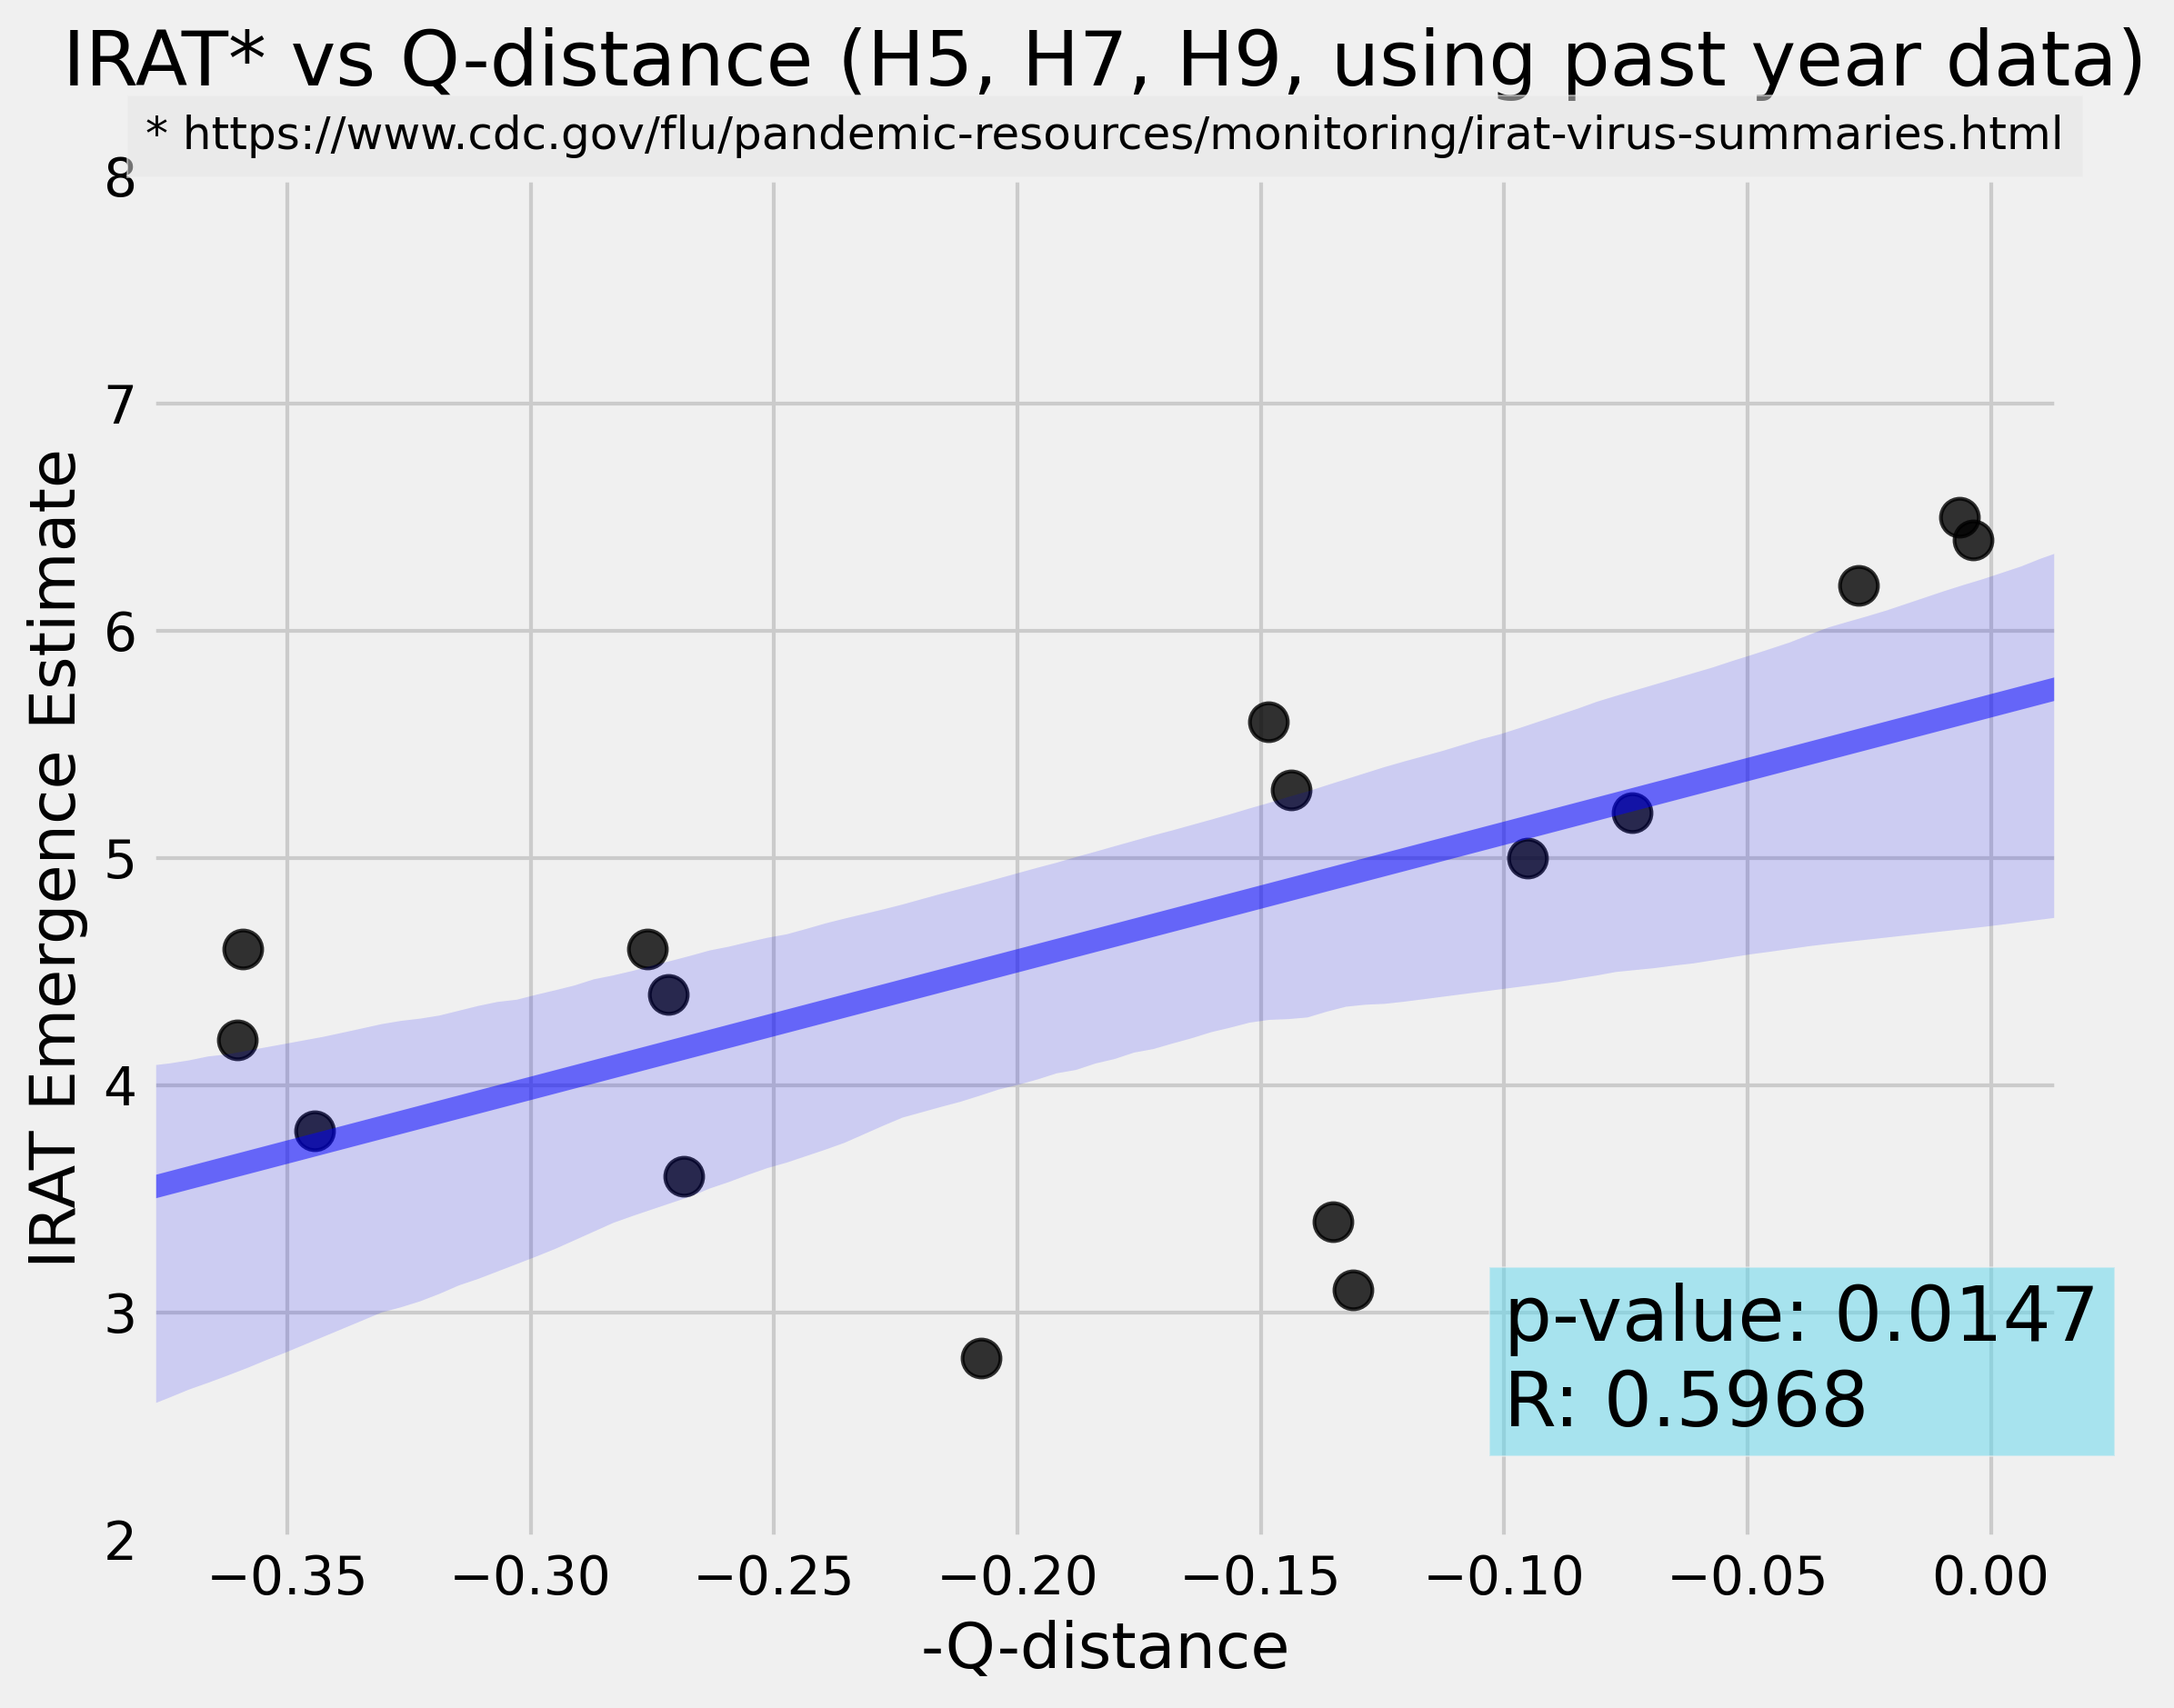

In [31]:
plt.figure(figsize = (7, 5))
X = df_h5_h7_h9['Geometric Mean']
Y = df_h5_h7_h9['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('IRAT* vs Q-distance (H5, H7, H9, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

# plt.figtext(0.35, 0.05, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.6, 0.21, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.2, 0.18, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.31, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.2, 0.46, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.24, 0.55, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.72, 0.45, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.55, 0.65, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.87, 0.66, "H7N9 [A/Shanghai\n/02/2013]", ha="center", fontsize=12, color='maroon');
# plt.figtext(0.85, 0.77, "H7N9 [A/Hong\nKong/125/2017]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h5_h7_h9_geometric_current',AXIS=True)

In [32]:
coords_df = df_h5_h7_h9[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.207456,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.130979,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.135107,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.268575,3.6
16,A/Northern pintail/Washington/40964/2014,H5N2,0.344453,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.360284,4.2
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.271731,4.4
11,A/Astrakhan/3212/2020,H5N8,0.359110,4.6
12,A/Netherlands/219/2003,H7N7,0.276012,4.6
10,A/Yunnan/14564/2015,H5N6,0.095266,5.0
